In [50]:
import matplotlib.pyplot as plt
import torch
from torch import nn

In [51]:
weight = 0.42
bias = 0.56

x = torch.arange(0, 1, 0.02)
y = x * weight + bias

x, y

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([0.5600, 0.5684, 0.5768, 0.5852, 0.5936, 0.6020, 0.6104, 0.6188, 0.6272,
         0.6356, 0.6440, 0.6524, 0.6608, 0.6692, 0.6776, 0.6860, 0.6944, 0.7028,
         0.7112, 0.7196, 0.7280, 0.7364, 0.7448, 0.7532, 0.7616, 0.7700, 0.7784,
         0.7868, 0.7952, 0.8036, 0.8120, 0.8204, 0.8288, 0.8372, 0.8456, 0.8540,
         0.8624, 0.8708, 0.8792, 0.8876, 0.8960, 0.9044, 0.9128, 0.9212, 0.9296,
         0.9380, 0.9464, 0.9548, 0.9632, 0.9716]))

In [52]:
train_split = int(0.8 * len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [53]:
def plot_predictions(
        train_data=x_train,
        train_labels=y_train,
        test_data=x_test,
        test_labels=y_test,
        predictions=None
):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=7, label="Predictions")

    plt.legend(prop={"size": 14})

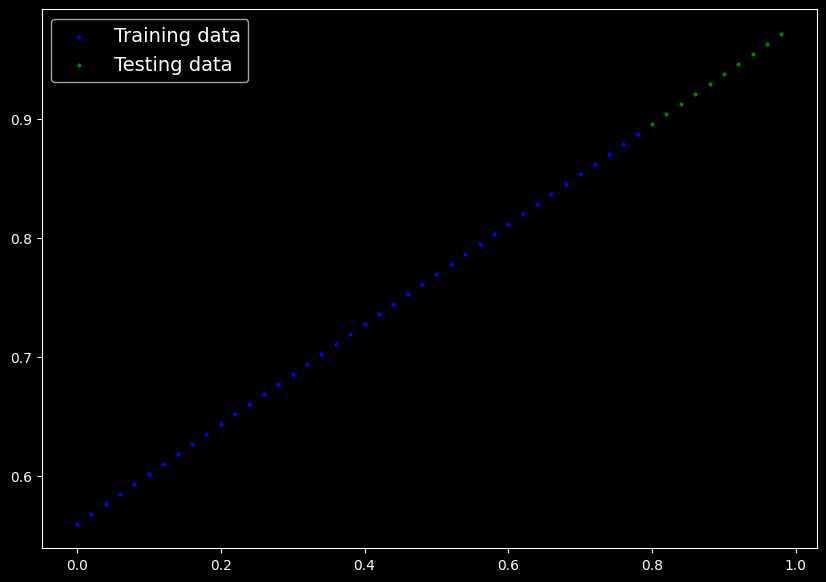

In [54]:
plot_predictions()

In [55]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float32, requires_grad=True))

    def forward(self, c: torch.Tensor):
        return c * self.weight + self.bias

In [56]:
model = LinearRegression()

In [57]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
torch.manual_seed(42)
epochs = 1000
epoch_count = []
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()

    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_losses.append(loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}")


Epoch: 0, Loss: 0.53528892993927, Test Loss: 0.7475236654281616
Epoch: 10, Loss: 0.3962891101837158, Test Loss: 0.5585237741470337
Epoch: 20, Loss: 0.25728923082351685, Test Loss: 0.3695240020751953
Epoch: 30, Loss: 0.11828937381505966, Test Loss: 0.18052417039871216
Epoch: 40, Loss: 0.01809290423989296, Test Loss: 0.002967840526252985
Epoch: 50, Loss: 0.02826029621064663, Test Loss: 0.00392078747972846
Epoch: 60, Loss: 0.019466012716293335, Test Loss: 0.049914926290512085
Epoch: 70, Loss: 0.010508155450224876, Test Loss: 0.0021292984019964933
Epoch: 80, Loss: 0.002243340015411377, Test Loss: 0.0010823309421539307
Epoch: 90, Loss: 0.0026881187222898006, Test Loss: 0.0070191859267652035
Epoch: 100, Loss: 0.001436528516933322, Test Loss: 0.0014311432605609298
Epoch: 110, Loss: 0.0012717172503471375, Test Loss: 0.002258849097415805
Epoch: 120, Loss: 0.001407845295034349, Test Loss: 0.0012557923328131437
Epoch: 130, Loss: 0.00016274451627396047, Test Loss: 0.0014588057529181242
Epoch: 140,

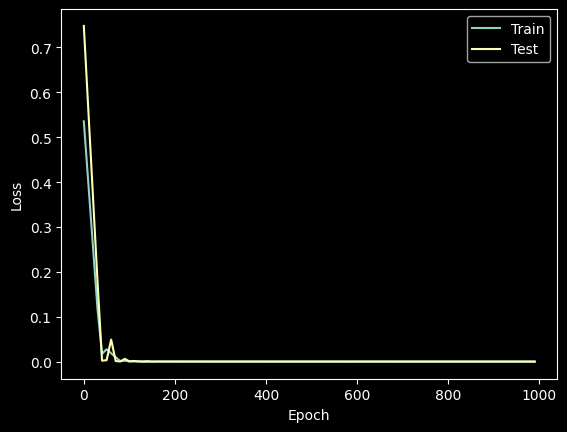

In [59]:
plt.plot(epoch_count, train_losses)
plt.plot(epoch_count, test_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"])

(tensor([0.8969, 0.9053, 0.9137, 0.9221, 0.9305, 0.9389, 0.9473, 0.9557, 0.9642,
         0.9726]),
 tensor([0.8960, 0.9044, 0.9128, 0.9212, 0.9296, 0.9380, 0.9464, 0.9548, 0.9632,
         0.9716]))

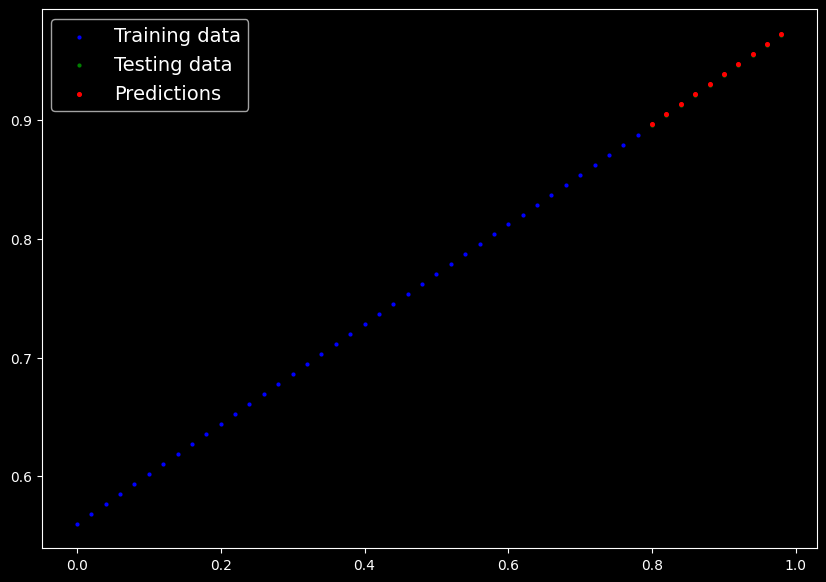

In [60]:
model.eval()
with torch.inference_mode():
    plt_pred = model(x_test)

plot_predictions(predictions=plt_pred)

plt_pred, y_test